This notebook is used to process some columns in the parsed coffee review dataset.

Columns to be processed
- Roast Level: Replace empty string with NA; Convert to an ordinal variable 
- Agtron: Seperate into Agtron_whole and Agtron_ground
- Roaster Location
- Coffee Origin

# Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data

In [2]:
data = pd.read_csv("../data/coffee_reviews_parsed.csv")
data

,URL,all_text,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,...,Acidity,Acidity/Structure,Body,Flavor,Aftertaste,With Milk,Blind Assessment,Notes,Who Should Drink It,Bottom Line
0,https://www.coffeereview.com/review/100-arabic...,89\nCaffe Bomrad\n100% Arabica 100% Italiano\n...,89.0,Caffe Bomrad,100% Arabica 100% Italiano,"Torino, Italy",Not disclosed.,Medium,48/65,$54.00/1 Kilogram,...,NaN,NaN,8.0,8.0,7.0,8.0,Evaluated as espresso. Smoothly round aroma: t...,Roasted in Northern Italy and distributed in N...,A strong-charactered Northern Italian styled e...,NaN
1,https://www.coffeereview.com/review/100-arabic...,"87\nLucaff?\n100% Arabica, Black Label (ESE po...",87.0,Lucaff?,"100% Arabica, Black Label (ESE pod)","Padenghe sul Garda, Italy",Not disclosed.,Dark,0/80,NaN,...,NaN,NaN,8.0,7.0,7.0,8.0,Produced from an ESE pod on a FrancisFrancis! ...,ESE (Easy Serving Espresso) pods are wafer-lik...,An attractive pod espresso for big milk drinks.,NaN
2,https://www.coffeereview.com/review/100-arabic...,87\nCaribeans\n100% Arabica Coffee from Puerto...,87.0,Caribeans,100% Arabica Coffee from Puerto Rico,"San Juan, Puerto Rico","Utuado, central Puerto Rico",Medium-Light,54/69,$17.00/8 ounces,...,7.0,NaN,7.0,8.0,7.0,NaN,Bittersweet but balanced; chocolaty. Dark choc...,Produced on a single farm in the central mount...,NaN,Satisfying chocolate and nut notes nearly carr...
3,https://www.coffeereview.com/review/100-arabic...,88\nWaka Coffee\n100% Arabica Freeze-Dried Col...,88.0,Waka Coffee,100% Arabica Freeze-Dried Colombian (Instant C...,"Los Angeles, California",Colombia,NaN,0/0,$10.99/8 single-serve packets,...,NaN,7.0,8.0,8.0,8.0,NaN,Evaluated at proportions of 5 grams of instant...,The green coffee for this product was produced...,NaN,A appealing 100% Colombia coffee in instant fo...
4,https://www.coffeereview.com/review/100-arabic...,72\nYuban\n100% Arabica Instant Coffee\nRoaste...,72.0,Yuban,100% Arabica Instant Coffee,"Northfield, Illinois",Colombia. All coffee of the Arabica species.,NaN,0/0,$8.27/8 ounces instant,...,4.0,NaN,7.0,3.0,4.0,NaN,In the aroma caramel and wet burned wood notes...,An instant coffee evaluated as mixed in propor...,"Not good, but not the worst of the instants on...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,https://www.coffeereview.com/review/zimbabwean...,88\nLeopard Forest Coffee\nZimbabwean Peaberry...,88.0,Leopard Forest Coffee,Zimbabwean Peaberry,"Travelers Rest, South Carolina","Eastern Highlands, Zimbabwe",Medium,48/67,NaN,...,7.0,NaN,8.0,8.0,7.0,NaN,"Low-toned, deep aroma with a tight-knit comple...",Historically Zimbabwe has been the premier cof...,A quietly bright breakfast cup with some pleas...,NaN
8383,https://www.coffeereview.com/review/zimbabwe/,83\nThe Sensuous Bean\nZimbabwe\nRoaster Locat...,83.0,The Sensuous Bean,Zimbabwe,"New York, New York","Chipinge growing region, eastern Zimbabwe",Medium,50/63,NaN,...,6.0,NaN,8.0,6.0,7.0,NaN,A potentially fine coffee compromised by mild ...,Historically Zimbabwe has been the premier cof...,"Those who enjoy the earthy, musty tones in som...",NaN
8384,https://www.coffeereview.com/review/zombie-des...,87\nCafe Kreyol\nZombie Desert 100% Organic Ha...,87.0,Cafe Kreyol,Zombie Desert 100% Organic Haitian Bleu,"Fairfax, Virginia.","Artibonite growing region, Haiti.",Medium-Dark,47/52,$14.99/12 ounces,...,7.0,NaN,8.0,7.0,7.0,NaN,"Smoky, pungent. Very lightly scorched cedar, b...","Like all Haitian coffee, this is produced enti...",Those who enjoy pungently bracing medium-dark-...,NaN
8385,https://www.coffeereview.com/review/zoom-espre...,93\nZuco Coffee Roasters\nZoom Espresso\nRoast...,93.0,Zuco Coffee Roasters,Zoom Espresso,"Hong Kong, China",Honduras; Ethiopia; Brazil,Medium,44/60,HK $150/250 grams,...,NaN,NaN,8.0,9.0,8.0,9.0,"Evaluated as espresso. Rich, winey, floral. Ba...","Zoom is a signature espresso blend from Zuco, ...",NaN,"A complex, lively espr

# Roast level

In [3]:
data["Roast Level"].value_counts()

Roast Level
Medium-Light    3586
Medium          1622
Light           1266
Medium-Dark      782
Very Dark        387
Dark             238
Name: count, dtype: int64

In [6]:
# Define order for this variable
ordered_categories = ["Light", "Medium-Light", "Medium", "Medium-Dark", "Dark", "Very Dark"]
data["Roast Level_ordinal"] = pd.Categorical(data["Roast Level"], categories=ordered_categories, ordered=True)

## Roast Level vs Rating

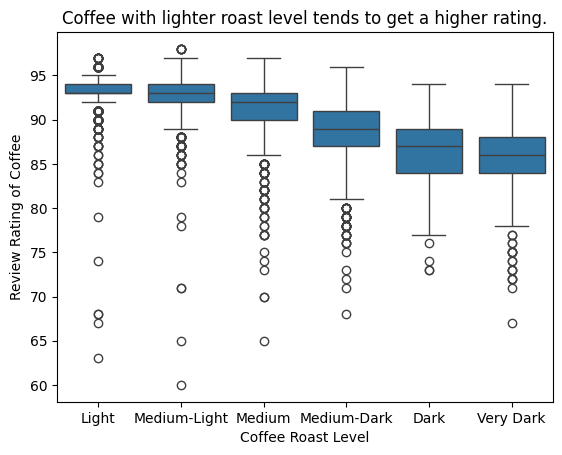

In [ ]:
# sns.boxplot(x="Roast Level_ordinal", y="Rating", data=data)
# plt.title("Coffee with lighter roast level tends to get a higher rating.")
# plt.xlabel("Coffee Roast Level")
# plt.ylabel("Review Rating of Coffee")
# plt.show()

# Agtron

In [7]:
data[['Agtron_whole', 'Agtron_ground']] = data['Agtron'].str.split('/', expand=True)
data['Agtron_whole'] = pd.to_numeric(data['Agtron_whole'], errors='coerce')
data['Agtron_ground'] = pd.to_numeric(data['Agtron_ground'], errors='coerce')
data

,URL,all_text,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,...,Flavor,Aftertaste,With Milk,Blind Assessment,Notes,Who Should Drink It,Bottom Line,Roast Level_ordinal,Agtron_whole,Agtron_ground
0,https://www.coffeereview.com/review/100-arabic...,89\nCaffe Bomrad\n100% Arabica 100% Italiano\n...,89.0,Caffe Bomrad,100% Arabica 100% Italiano,"Torino, Italy",Not disclosed.,Medium,48/65,$54.00/1 Kilogram,...,8.0,7.0,8.0,Evaluated as espresso. Smoothly round aroma: t...,Roasted in Northern Italy and distributed in N...,A strong-charactered Northern Italian styled e...,NaN,Medium,48.0,65.0
1,https://www.coffeereview.com/review/100-arabic...,"87\nLucaff?\n100% Arabica, Black Label (ESE po...",87.0,Lucaff?,"100% Arabica, Black Label (ESE pod)","Padenghe sul Garda, Italy",Not disclosed.,Dark,0/80,NaN,...,7.0,7.0,8.0,Produced from an ESE pod on a FrancisFrancis! ...,ESE (Easy Serving Espresso) pods are wafer-lik...,An attractive pod espresso for big milk drinks.,NaN,Dark,0.0,80.0
2,https://www.coffeereview.com/review/100-arabic...,87\nCaribeans\n100% Arabica Coffee from Puerto...,87.0,Caribeans,100% Arabica Coffee from Puerto Rico,"San Juan, Puerto Rico","Utuado, central Puerto Rico",Medium-Light,54/69,$17.00/8 ounces,...,8.0,7.0,NaN,Bittersweet but balanced; chocolaty. Dark choc...,Produced on a single farm in the central mount...,NaN,Satisfying chocolate and nut notes nearly carr...,Medium-Light,54.0,69.0
3,https://www.coffeereview.com/review/100-arabic...,88\nWaka Coffee\n100% Arabica Freeze-Dried Col...,88.0,Waka Coffee,100% Arabica Freeze-Dried Colombian (Instant C...,"Los Angeles, California",Colombia,NaN,0/0,$10.99/8 single-serve packets,...,8.0,8.0,NaN,Evaluated at proportions of 5 grams of instant...,The green coffee for this product was produced...,NaN,A appealing 100% Colombia coffee in instant fo...,NaN,0.0,0.0
4,https://www.coffeereview.com/review/100-arabic...,72\nYuban\n100% Arabica Instant Coffee\nRoaste...,72.0,Yuban,100% Arabica Instant Coffee,"Northfield, Illinois",Colombia. All coffee of the Arabica species.,NaN,0/0,$8.27/8 ounces instant,...,3.0,4.0,NaN,In the aroma caramel and wet burned wood notes...,An instant coffee evaluated as mixed in propor...,"Not good, but not the worst of the instants on...",NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,https://www.coffeereview.com/review/zimbabwean...,88\nLeopard Forest Coffee\nZimbabwean Peaberry...,88.0,Leopard Forest Coffee,Zimbabwean Peaberry,"Travelers Rest, South Carolina","Eastern Highlands, Zimbabwe",Medium,48/67,NaN,...,8.0,7.0,NaN,"Low-toned, deep aroma with a tight-knit comple...",Historically Zimbabwe has been the premier cof...,A quietly bright breakfast cup with some pleas...,NaN,Medium,48.0,67.0
8383,https://www.coffeereview.com/review/zimbabwe/,83\nThe Sensuous Bean\nZimbabwe\nRoaster Locat...,83.0,The Sensuous Bean,Zimbabwe,"New York, New York","Chipinge growing region, eastern Zimbabwe",Medium,50/63,NaN,...,6.0,7.0,NaN,A potentially fine coffee compromised by mild ...,Historically Zimbabwe has been the premier cof...,"Those who enjoy the earthy, musty tones in som...",NaN,Medium,50.0,63.0
8384,https://www.coffeereview.com/review/zombie-des...,87\nCafe Kreyol\nZombie Desert 100% Organic Ha...,87.0,Cafe Kreyol,Zombie Desert 100% Organic Haitian Bleu,"Fairfax, Virginia.","Artibonite growing region, Haiti.",Medium-Dark,47/52,$14.99/12 ounces,...,7.0,7.0,NaN,"Smoky, pungent. Very lightly scorched cedar, b...","Like all Haitian coffee, this is produced enti...",Those who enjoy pungently bracing medium-dark-...,NaN,Medium-Dark,47.0,52.0
8385,https://www.coffeereview.com/review/zoom-espre...,93\nZuco Coffee Roasters\nZoom Espresso\nRoast...,93.0,Zuco Coffee Roasters,Zoom Espresso,"Hong Kong, China",Honduras; Ethiopia; Brazil,Medium,44/60,HK $150/250 grams,...,9.0,8.0,9.0,"Evaluated as espresso. Rich, winey, floral. Ba...","Zoom is a signature espresso blend f

# Roaster Location
For this column:

- If the place relates to the USA, it follows "City, State/Territory" pattern;
- If the place is outside the USA, it follows "Town/City, Country" pattern.

Note that **Puerto Rico** is neither a Country nor a State. It is a self-governing Caribbean archipelago and island organized as an unincorporated territory of the United States under the designation of commonwealth. (From Wikipedia)

Therefore, we break this column down into 3 variables: “Town/City”, “State/Territory”, “Country”.

Step 1: Check if values in this column all follows "A, B" pattern in order to define the split function well - No!

Step 2: Check the largest number of parts after spliting the cell by "," - largest number = 3

Step 3: Check if the location for each Roaster is consistent or not, can we use another table to store the roaster information?


In [9]:
data["Roaster Location"]

0                        Torino, Italy
1            Padenghe sul Garda, Italy
2                San Juan, Puerto Rico
3              Los Angeles, California
4                 Northfield, Illinois
                     ...              
8382    Travelers Rest, South Carolina
8383                New York, New York
8384                Fairfax, Virginia.
8385                  Hong Kong, China
8386                Madison, Wisconsin
Name: Roaster Location, Length: 8387, dtype: object

## Step 1: Check patttern

In [12]:
# First, we check if all cells in "Roaster Location" column follows "A,B" pattern.
# Regex pattern to match "City, State/Territory" or "City, Country"
pattern = r'^[A-Za-z\s]+,\s[A-Za-z\s]+$'

# Function to apply the regex check
def check_pattern(location):
    # Ensure the location is a string before applying regex
    if isinstance(location, str):
        return bool(re.match(pattern, location))
    return False

# Apply the function to check the pattern for each row
data['location_is_valid'] = data['Roaster Location'].apply(check_pattern)
data[data['location_is_valid'] == False]

,URL,all_text,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,...,Aftertaste,With Milk,Blind Assessment,Notes,Who Should Drink It,Bottom Line,Roast Level_ordinal,Agtron_whole,Agtron_ground,location_is_valid
23,https://www.coffeereview.com/review/100-hawaii...,88\nJavaloha\n100% Hawaiian Coffee Hamakua Est...,88.0,Javaloha,100% Hawaiian Coffee Hamakua Estate,"Pa'auilo, Hawaii","Hamakua district, northeastern coast of the Bi...",Medium-Dark,43/54,$30 / 16 oz.,...,7.0,NaN,"Tart, grapefruity pungency, hints of sweet coc...","Javaloha coffee is grown at an elevation of 2,...",Aficionados interested in an emerging new Hawa...,NaN,Medium-Dark,43.0,54.0,False
24,https://www.coffeereview.com/review/100-jamaic...,89\nStoneleigh Coffee\n100% Jamaica Blue Mount...,89.0,Stoneleigh Coffee,100% Jamaica Blue Mountain,"Toronto, Ontario, Canada","Blue Mountain growing region, eastern Jamaica.",Medium,50/61,$32.00/8 ounces,...,7.0,NaN,"Round, deeply sweet. Brown sugar, roasted caca...","Blue Mountain, grown in the lush, lovely mount...","Those who value the sweetness, full mouthfeel ...",NaN,Medium,50.0,61.0,False
27,https://www.coffeereview.com/review/100-kau-na...,93\nPacific Coffee Research\n100% Ka‘ū Navarro...,93.0,Pacific Coffee Research,100% Ka‘ū Navarro,"Kealakekua, Kona, “Big Island” of Hawai’i","Ka‘ū growing region, “Big Island” of Hawai’i",Light,60/84,$39.20/10 ounces,...,8.0,NaN,"Richly sweet-savory, deep-toned. Raspberry com...",Produced by Delvin and Nette Navarro of Navarr...,NaN,Fruit and floral notes occupy center stage in ...,Light,60.0,84.0,False
38,https://www.coffeereview.com/review/100-kona-e...,92\nKona Hills Coffee\n100% Kona Extra Fancy\n...,92.0,Kona Hills Coffee,100% Kona Extra Fancy,"Captain Cook, Hawai’i","Kona growing district, “Big Island” of Hawai’i",Medium-Light,57/76,$58.00/16 ounces,...,8.0,NaN,"Sweetly nutty, crisply chocolaty. Cashew butte...","Produced by Mike Takizawa of Kona Hills Farm, ...",NaN,"A nut-driven, chocolaty Kona Typica with invit...",Medium-Light,57.0,76.0,False
51,https://www.coffeereview.com/review/100-kona-t...,94\nKona Farm Direct\n100% Kona Typica\nRoaste...,94.0,Kona Farm Direct,100% Kona Typica,"Holualoa, Hawai’i","Kona growing region, Big Island of Hawai’i",Medium-Light,58/80,$27.95/7 ounces,...,8.0,NaN,"Sweet-toned, chocolaty and rich. Dark chocolat...","Produced by Kona Farm Direct, entirely of the ...",NaN,"A lively, balanced washed Kona cup with a dark...",Medium-Light,58.0,80.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,https://www.coffeereview.com/review/yemen-natu...,95\nKakalove Cafe\nYemen Natural Sana’a Manakh...,95.0,Kakalove Cafe,Yemen Natural Sana’a Manakhah Ja’adi,"Chia-Yi, Taiwan","Manakhah, Sana'a, Yemen",Medium-Light,58/77,NT $900/4 ounces,...,9.0,NaN,"Deeply spice-toned, richly layered. Black curr...",Produced by smallholding farmers entirely of t...,NaN,"A deeply aromatic, richly fruit- and chocolate...",Medium-Light,58.0,77.0,False
8341,https://www.coffeereview.com/review/yirgacheff...,94\nSO Roasters\nYirgacheffe Aricha Natural G1...,94.0,SO Roasters,Yirgacheffe Aricha Natural G1,South Korea,"Yirgacheffe growing region, southern Ethiopia.",Medium-Light,59/74,"KRW$10,500/100 grams",...,8.0,NaN,"Sweet, intense, melodic. Blueberry, tangerine,...",Most Yirgacheffe coffee is prepared by the con...,"A sweet, cleanly fermenty dried-in-the-fruit E...",NaN,Medium-Light,59.0,74.0,False
8365,https://www.coffeereview.com/review/zafiro/,92\nFinca Tasta\nZafiro\nRoaster Location:\nLl...,92.0,Finca Tasta,Zafiro,"Llayla District, Satipo Province, Peru","Llayla District, Satipo Province, Peru",Medium-Light,60/78,$10.00/250 grams,...,8.0,NaN,"Complex, sweet-savory. Tamarind, cocoa nib, ma...",Produced and roasted by the Meza family at Fin...,NaN,"A nuanced, multilayered Peru Pacamara processe...",Medium-Light,60.0,78.0,False
8380,https://www.coffeereview.com/review/zimbabwe-g...,80\nLa Lu

In [14]:
data['Roaster Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8387 entries, 0 to 8386
Series name: Roaster Location
Non-Null Count  Dtype 
--------------  ----- 
8281 non-null   object
dtypes: object(1)
memory usage: 65.6+ KB


## Step 2: Check number of parts

In [16]:
# Step 2: Check the number of parts in location
def count_parts(location):
    if isinstance(location, str):  # Check if the value is a string
        return len(location.split(','))
    return 0  # Return 0 if it's not a string (e.g., NaN)

data['num_loc_parts'] = data['Roaster Location'].apply(count_parts)
data['num_loc_parts'].value_counts()

num_loc_parts
2    7926
3     284
0     106
1      71
Name: count, dtype: int64

Interpret the number of parts:

- 0: Missing Roaster location info (106 rows)
- 1: Multiple cases (71 rows) - possible process method: Check if the location for each Roaster is consistent or not.
    - Some indicate Country like "Zimbabwe" and "El Salvador". But "Taiwan" is not a Country here.
    - [One review page](https://www.coffeereview.com/review/black-espresso/) has a mistake in Roaster Location info! It should be NaN instead. [The original coffee page](https://cmykcoffee.com/products/black?_pos=1&_sid=341ed5d0d&_ss=r)
    - [One review page](https://www.coffeereview.com/review/burundi-bwayi/) use "." instead of "," as the spliter: "Peoria. Illinois".
    - [One review page](https://www.coffeereview.com/review/sumatra-beveo/) use " " instead of "," as the spliter: "Scottsdale Arizona". But some Country names also include " ", which makes this case hard to process.
    - [One review page](https://www.coffeereview.com/review/sumatra-tano-batak/) use "Sacr" to indicate a location, which might be a shorthand for "Sacramento, California" ([The original Roaster Page](https://templecoffee.com/pages/locations)).
    - 2 pages: [page 1](https://www.coffeereview.com/review/green-coffee-zambia/) and [page 2](https://www.coffeereview.com/review/green-coffee-zimbabwe/) use "Grower" which seems not a location name. Found some information on Internet: [Kowa](https://www.instagram.com/kowacoffee/), [Terranova Estate](https://coffeaalchemy.com/zambia-terranova-coffee-beans/)



In [40]:
data.loc[3997, 'URL']

'https://www.coffeereview.com/review/green-coffee-zimbabwe/'

In [34]:
# data[(data['num_loc_parts'] == 0) & (data['Roaster Location'].notna())]
data[data['num_loc_parts'] == 2]


,URL,all_text,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,...,With Milk,Blind Assessment,Notes,Who Should Drink It,Bottom Line,Roast Level_ordinal,Agtron_whole,Agtron_ground,location_is_valid,num_loc_parts
0,https://www.coffeereview.com/review/100-arabic...,89\nCaffe Bomrad\n100% Arabica 100% Italiano\n...,89.0,Caffe Bomrad,100% Arabica 100% Italiano,"Torino, Italy",Not disclosed.,Medium,48/65,$54.00/1 Kilogram,...,8.0,Evaluated as espresso. Smoothly round aroma: t...,Roasted in Northern Italy and distributed in N...,A strong-charactered Northern Italian styled e...,NaN,Medium,48.0,65.0,True,2
1,https://www.coffeereview.com/review/100-arabic...,"87\nLucaff?\n100% Arabica, Black Label (ESE po...",87.0,Lucaff?,"100% Arabica, Black Label (ESE pod)","Padenghe sul Garda, Italy",Not disclosed.,Dark,0/80,NaN,...,8.0,Produced from an ESE pod on a FrancisFrancis! ...,ESE (Easy Serving Espresso) pods are wafer-lik...,An attractive pod espresso for big milk drinks.,NaN,Dark,0.0,80.0,True,2
2,https://www.coffeereview.com/review/100-arabic...,87\nCaribeans\n100% Arabica Coffee from Puerto...,87.0,Caribeans,100% Arabica Coffee from Puerto Rico,"San Juan, Puerto Rico","Utuado, central Puerto Rico",Medium-Light,54/69,$17.00/8 ounces,...,NaN,Bittersweet but balanced; chocolaty. Dark choc...,Produced on a single farm in the central mount...,NaN,Satisfying chocolate and nut notes nearly carr...,Medium-Light,54.0,69.0,True,2
3,https://www.coffeereview.com/review/100-arabic...,88\nWaka Coffee\n100% Arabica Freeze-Dried Col...,88.0,Waka Coffee,100% Arabica Freeze-Dried Colombian (Instant C...,"Los Angeles, California",Colombia,NaN,0/0,$10.99/8 single-serve packets,...,NaN,Evaluated at proportions of 5 grams of instant...,The green coffee for this product was produced...,NaN,A appealing 100% Colombia coffee in instant fo...,NaN,0.0,0.0,True,2
4,https://www.coffeereview.com/review/100-arabic...,72\nYuban\n100% Arabica Instant Coffee\nRoaste...,72.0,Yuban,100% Arabica Instant Coffee,"Northfield, Illinois",Colombia. All coffee of the Arabica species.,NaN,0/0,$8.27/8 ounces instant,...,NaN,In the aroma caramel and wet burned wood notes...,An instant coffee evaluated as mixed in propor...,"Not good, but not the worst of the instants on...",NaN,NaN,0.0,0.0,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,https://www.coffeereview.com/review/zimbabwean...,88\nLeopard Forest Coffee\nZimbabwean Peaberry...,88.0,Leopard Forest Coffee,Zimbabwean Peaberry,"Travelers Rest, South Carolina","Eastern Highlands, Zimbabwe",Medium,48/67,NaN,...,NaN,"Low-toned, deep aroma with a tight-knit comple...",Historically Zimbabwe has been the premier cof...,A quietly bright breakfast cup with some pleas...,NaN,Medium,48.0,67.0,True,2
8383,https://www.coffeereview.com/review/zimbabwe/,83\nThe Sensuous Bean\nZimbabwe\nRoaster Locat...,83.0,The Sensuous Bean,Zimbabwe,"New York, New York","Chipinge growing region, eastern Zimbabwe",Medium,50/63,NaN,...,NaN,A potentially fine coffee compromised by mild ...,Historically Zimbabwe has been the premier cof...,"Those who enjoy the earthy, musty tones in som...",NaN,Medium,50.0,63.0,True,2
8384,https://www.coffeereview.com/review/zombie-des...,87\nCafe Kreyol\nZombie Desert 100% Organic Ha...,87.0,Cafe Kreyol,Zombie Desert 100% Organic Haitian Bleu,"Fairfax, Virginia.","Artibonite growing region, Haiti.",Medium-Dark,47/52,$14.99/12 ounces,...,NaN,"Smoky, pungent. Very lightly scorched cedar, b...","Like all Haitian coffee, this is produced enti...",Those who enjoy pungently bracing medium-dark-...,NaN,Medium-Dark,47.0,52.0,False,2
8385,https://www.coffeereview.com/review/zoom-espre...,93\nZuco Coffee Roasters\nZoom Espresso\nRoast...,93.0,Zuco Coffee Roasters,Zoom Espresso,"Hong Kong, China",Honduras; Ethiopia; Brazil,Medium,44/60,HK $150/250 grams,...,9.0,"Evaluated as espresso. Rich, winey, floral. Ba...","Zoom is a signature espresso blend fr

# Coffee Origin